In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

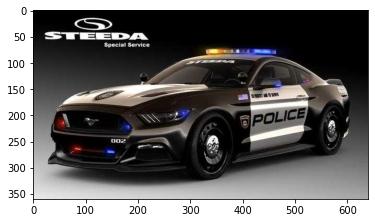

In [2]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    

In [3]:
def prepare(filepath, intensity_factor=1.5):
    # Read the image from the file path
    img_array = cv2.imread(filepath)
    
    # Convert the image to RGB format
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    
    # Define the color range for siren colors
    lower_siren_red = np.array([0, 0, 150])
    upper_siren_red = np.array([100, 100, 255])

    lower_siren_blue = np.array([150, 0, 0])
    upper_siren_blue = np.array([255, 100, 100])

    # Create masks for each siren color
    mask_red = cv2.inRange(img_array_rgb, lower_siren_red, upper_siren_red)
    mask_blue = cv2.inRange(img_array_rgb, lower_siren_blue, upper_siren_blue)

    # Combine the masks to get the final mask for siren colors
    final_mask = mask_red | mask_blue

    # Enhance the intensity of the siren colors
    enhanced_siren = img_array.copy()
    enhanced_siren[final_mask != 0] = enhanced_siren[final_mask != 0] * intensity_factor

    # Blend the enhanced siren back with the original image
    result_image = cv2.addWeighted(img_array, 1, enhanced_siren, 0.5, 0)

    # Resize the result image to the specified size (224x224)
    resized_img = cv2.resize(result_image, (img_size, img_size))

    # Normalize pixel values to the range [0, 1]
    resized_img = resized_img / 255.0

    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)
    
    return resized_img


In [4]:
training_data = []
img_size = 224
def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        print(f"Processing images in category {category}...")
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                processed_image = prepare(img_path)
                print(f"Processed image: {img_path}")
                training_data.append([processed_image, class_num])
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

create_train_data()
print(f"Number of training examples: {len(training_data)}")

Processing images in category Police...
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0366C1DSTJGL.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\05921XNUOU1X.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0862TJ9ITTCU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\09O3G4M81I3M.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\09S60T7Y0252.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0C8GPL22N2FX.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/tra

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4LWAHSWN02NZ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4MHL9NMC7U2K.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4N2LA6EZCT2T.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4OU9VKLSJS34.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4PI5WZ08IC4K.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4PJSVO21K1QU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\4UI6XGYYIUQG.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8BM0G4ENU2KX.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8CIV8GRIC4SJ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8CZU2DFRTMT1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8EM99D2233DR.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8GMFRS4QWHO2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8IQ36GZ7I3D3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\8JPBU109FOD6.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\B7168PNZID2U.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\B7K6GBJD0HIG.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\B7QREYC087S4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\BCEYYX3LEUD4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\BCUNYGNKNUVZ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\BD95W9A75JHJ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\BEBUECF2NZC3.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E19FPCNSDJB3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E1H62YI71GEE.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E21O5NJ8PAEQ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E33UE4YMC7W3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E7I4RG259ZQI.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\E8JNHSPF9RKH.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\EAF8MG1CRWUX.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HJ2WEEL7TCQA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HJD2WMZGP1GM.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HKUYKKSWSWOW.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HMSJ29LWF5MC.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HNIVET6X3ORU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HNOFRT0B00MC.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\HPWYRSTIAUWQ.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KN28OX2WHEPT.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KQ7H9D2HLKCG.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KS713XQ08MWA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KV0IQ1Z1SQ94.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KZ5Y6MM34LWA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L0WU8B8XMK2I.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L1N4OGBHHL7A.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\O9HX3MPDYELK.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OB67KSKJLT7X.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OB6XL5EL9BB4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OBAKA8U8J5J0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OGM3OTLEPBM2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OGNADBO9ME09.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\OHF6IX97VQ8M.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RCNCDEI42IAV.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RCPQ1PEED7YU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RD3HW3ITBGX0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RE9JT9KFD02W.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\REQEAXKE75QW.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RF5KOXQ19S9O.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\RFSNYIQFRMKK.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\TVUJW107Z09M.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\TX3LM8T7FAXU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\TXL72Q5M0ZZ4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\U1B6RJT7H9RH.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\U5URNYWJRWIY.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\U6ROTWFABKMF.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\U9B0DJE54RS2.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X1CRUX9Y4BHD.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X1GXE8Z8U0NM.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X4BPQ7EQP5YC.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X5DPT72WUQP1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X5IE9NO7FDYI.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X5UE3BIRPNPL.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\X66HF1JPV7MS.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0573F94C-289D-4503-A571-94C6C8C5674C-png_jpg.rf.b1f181f00b728c2bcb06df209bddeeae.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0585CFA0-7CD6-45D3-B7EB-1A109425F90D-png_jpg.rf.0b25f77b41871052acb3f3592b379be4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0585CFA0-7CD6-45D3-B7EB-1A109425F90D-png_jpg.rf.7bd5ba345d8927bac37c4d84078c5d11.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0585CFA0-7CD6-45D3-B7EB-1A109425F90D-png_jpg.rf.f3e833a8f5ec42bc1da5d80e308bc091.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0ACAD937-70A4-46F0-8E49-0CAE6F942CF

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-152B35A7-2687-4126-B46B-5382319E7A3C-png_jpg.rf.a573b8505f58b01adfd6cb4314056a5c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-156F82DF-5099-4AEA-8574-19720B40C034-png_jpg.rf.37a8b18e15f4b4e62e2444576bcb955d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-156F82DF-5099-4AEA-8574-19720B40C034-png_jpg.rf.89e7f8b48604e0003809738aa617d6e9.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-156F82DF-5099-4AEA-8574-19720B40C034-png_jpg.rf.9cbd7752fa9c49090cc944caa297fbc7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-15F66BCC-7D1B-4C04-82EF-C560EC4C612

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2229E395-534F-4F69-9F9B-80628BD8D5AC-png_jpg.rf.f201430a47a8cbb89f83ae0ec0b4f911.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2229E395-534F-4F69-9F9B-80628BD8D5AC-png_jpg.rf.f8a46696d709dcd466e4eecb1075ee0e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-232CA389-A176-4AB7-A513-8D2D5E477CC2-png_jpg.rf.017f2aacd2900867b3a633880f09a42e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-232CA389-A176-4AB7-A513-8D2D5E477CC2-png_jpg.rf.300c834d9b0176b3c9e2237f3c3f9fcc.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-232CA389-A176-4AB7-A513-8D2D5E477CC

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2846226C-6A55-4876-B717-7F8A5FA4E560-png_jpg.rf.e5bdea47fd40533bcb8919d3dc435a33.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-28A7CBC5-452A-4B8D-91E0-397F87E23E7F-png_jpg.rf.4409adbdbac2ae87c0ded0655228cd4f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-28A7CBC5-452A-4B8D-91E0-397F87E23E7F-png_jpg.rf.8a9fa260c3c2f3634b59b6ffe7698ce7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-28A7CBC5-452A-4B8D-91E0-397F87E23E7F-png_jpg.rf.9d35dc66b9a415b77327f76105eb2b6d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2AE9E484-CD7E-45FB-BD22-3EB7588C122

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37EAFDFC-4667-4A10-98F7-3C9FB6EC7912-png_jpg.rf.b4611d8f8333387846f94e94819977a0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37EAFDFC-4667-4A10-98F7-3C9FB6EC7912-png_jpg.rf.e310324e0504ee8614cd48034434a6a2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3827C0BE-B55D-4ADE-9938-9DC7D50A32DD-png_jpg.rf.33f382f6e4c60b469847316e56c49a23.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3827C0BE-B55D-4ADE-9938-9DC7D50A32DD-png_jpg.rf.359d280f051ebc3b383e7b28cea2d92f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3827C0BE-B55D-4ADE-9938-9DC7D50A32D

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3D578705-6794-4049-BF6D-A828FC4F0722-png_jpg.rf.bec981ea31fc8a16ff9612cd1ddf52d6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3D578705-6794-4049-BF6D-A828FC4F0722-png_jpg.rf.e28042ba549fcf545a78066ac1d300c0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-400E9E90-CD4A-470F-89E2-C9E1D1854AAB-png_jpg.rf.47ca8f578e7968411438e99c5db8d45f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-400E9E90-CD4A-470F-89E2-C9E1D1854AAB-png_jpg.rf.69f0f8aaf36f53b94cde4b053b51b635.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-400E9E90-CD4A-470F-89E2-C9E1D1854AA

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-496DFB6F-CD96-44F4-8CF4-683733EC79B6-png_jpg.rf.016199cc1b29908bd780f5af26df9446.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-496DFB6F-CD96-44F4-8CF4-683733EC79B6-png_jpg.rf.499f076a63e5fe95c8ae124ea8c1cf37.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-496DFB6F-CD96-44F4-8CF4-683733EC79B6-png_jpg.rf.8ad9bfccbb30aae6695339658991cae2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B472EFE-F5FA-44B6-A214-B41E70E2A0BC-png_jpg.rf.b1232bdb76914123e0e0610ef17feb93.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B472EFE-F5FA-44B6-A214-B41E70E2A0B

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5273059D-9AB0-4D26-B042-322F7A5E4CCD-png_jpg.rf.2bf270927b6fc374f5972d31221a70d9.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5273059D-9AB0-4D26-B042-322F7A5E4CCD-png_jpg.rf.96b6f31e7a3618f620039e711f119829.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5273059D-9AB0-4D26-B042-322F7A5E4CCD-png_jpg.rf.c96c7736018c75174d1b8fcad95980c3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-52C0EFE4-90C2-473F-9FEE-2E416111A8C7-png_jpg.rf.4c2d88637a11828bd9513706509b6a2d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-52C0EFE4-90C2-473F-9FEE-2E416111A8C

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-560FDA71-D338-4454-BC81-857A74DE813D-png_jpg.rf.406848449655a3242e6120c6a239b739.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-560FDA71-D338-4454-BC81-857A74DE813D-png_jpg.rf.61a2177acdfc5da911ca9aa46b4f93c7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-56EAA0B9-41EA-46F5-99F9-433F614E42FB-png_jpg.rf.2252fb6d91c4a6cab07fe09935d50981.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-56EAA0B9-41EA-46F5-99F9-433F614E42FB-png_jpg.rf.3e9b7ed54603eb48d51274a0fc07982c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-56EAA0B9-41EA-46F5-99F9-433F614E42F

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5D890027-73FC-42D9-B3D5-2ED473A73B66-png_jpg.rf.c3847f8d23d51efe4a20c4a994f233fd.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5DB86A4E-D64A-4032-ACF4-957B38D438C9-png_jpg.rf.06b131009c63eeb98f08cdadec76da03.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5DB86A4E-D64A-4032-ACF4-957B38D438C9-png_jpg.rf.590c1edb6acca320dad1f845c30ab3b5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5DB86A4E-D64A-4032-ACF4-957B38D438C9-png_jpg.rf.a710eecccff2ed1367d00e2c753df61d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5E037376-5D27-4953-9841-0083E8D06D0

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6895811E-6E26-4DBD-A7ED-F7A529684BBA-png_jpg.rf.a6509035a7eac8293b8edb2c2f3eea41.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6895811E-6E26-4DBD-A7ED-F7A529684BBA-png_jpg.rf.be742dd0c0c9309b83709b56ba45f08a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6895811E-6E26-4DBD-A7ED-F7A529684BBA-png_jpg.rf.cf6e1cb34e81393194ee98fd200538eb.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6895811E-6E26-4DBD-A7ED-F7A529684BBA-png_jpg.rf.f47aa41dddcffa332ae605c499239737.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6D8CF994-CDAD-4784-9A07-C91C6EEDA07

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB4261-png_jpg.rf.b66dc5b2d0cc4b53d52bea14d9601454.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB4261-png_jpg.rf.bd06c211182effe529b0cfcda5cbd2a0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BAAC60D7-E665-4186-BAA3-B3E20F8D397C-png_jpg.rf.0b1c554cc9348440b26b2bb49b070073.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BAAC60D7-E665-4186-BAA3-B3E20F8D397C-png_jpg.rf.c28cbd986f885673c7f39adf6d775e13.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BAAC60D7-E665-4186-BAA3-B3E20F8D397

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BEACF130-F07D-4352-87CF-2BBC32A8C5AC-png_jpg.rf.62ab638815a741572f8697f47d863bec.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BF27E7F2-0C42-45C0-A751-91723B77D799-png_jpg.rf.6a06509a3b5d5c443ceec95e7262b9ae.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BF27E7F2-0C42-45C0-A751-91723B77D799-png_jpg.rf.7c202ab7a89da21655216b24443ec7ab.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BF27E7F2-0C42-45C0-A751-91723B77D799-png_jpg.rf.f512558391387b2fb42de800b6307c36.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C006FC45-64AF-4FA9-B836-17F1DE49F18

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CA63295D-EEBE-42A2-943B-25B1D28D5745-png_jpg.rf.c1f7031347c566b90a03b9c7f79a6687.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CB279B0A-743F-4855-AE98-C9A9D0E40A22-png_jpg.rf.3ec0b77457c00e09f6def5aa97cd305c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CB279B0A-743F-4855-AE98-C9A9D0E40A22-png_jpg.rf.c3ab8b9f28d8669969bb6222002b9b10.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CB279B0A-743F-4855-AE98-C9A9D0E40A22-png_jpg.rf.f59f798d1509821ab428e3df1f95571e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CCEF01A1-0F47-495F-A37B-F77800A03B0

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E4-png_jpg.rf.1d7161aa72d365ff252ec9113410b0c7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E4-png_jpg.rf.557b8ced014debb43a117677456efe28.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E4-png_jpg.rf.da4a0ee7f8c2bb01735e4d1f414196d3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D994F2C9-B00C-45AB-B918-A4F8AB66DE71-png_jpg.rf.69cd667ad65be4041317286ca803f54d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D994F2C9-B00C-45AB-B918-A4F8AB66DE7

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-F6C8BDBB-4AF8-454C-9460-BB89186D193C-png_jpg.rf.2c6619e244fe1c150640f4511e067236.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-F6C8BDBB-4AF8-454C-9460-BB89186D193C-png_jpg.rf.797fb0556ff578b622d4271a65700d31.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-F6C8BDBB-4AF8-454C-9460-BB89186D193C-png_jpg.rf.a593e06578d76da6b3836dcf6aa555bf.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-F6C8BDBB-4AF8-454C-9460-BB89186D193C-png_jpg.rf.bf30ba3b26204893326113759faf8f8f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-F6C8BDBB-4AF8-454C-9460-BB89186D193

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\3_jpeg_jpg.rf.bbb45fd3fe070743c984124b38af1a77.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\6_jpeg_jpg.rf.004cd2732253bfe400d0de3e65c5fd73.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\6_jpeg_jpg.rf.48c0a4bae30ccc8c61ae1e7860c04726.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\6_jpeg_jpg.rf.69c88befe54f54d3808f35a7d243ff86.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\7_jpeg_jpg.rf.16f6cd0863f8df96bf2c873f04c76534.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\7

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-16-55_jpeg_jpg.rf.374533bff8202d563452ba37be2d11c7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-16-55_jpeg_jpg.rf.4cc3543b9add14b682e992050c4e8b67.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-16-55_jpeg_jpg.rf.95987db154bc60ecba629cd64c90f112.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-17-00_jpeg_jpg.rf.1c5ff170ba7ef80f84786efbc7e159f1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-29_jpeg_jpg.rf.e9e8ff533c4c036687dcee158cd5b934.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.228063d2f06df6f7337e83957b89750b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.93ffdbbe4140567d14c2df744cd84b1f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.b79179ec623d721ca3dfdeb7235844e5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-24-27_jpeg_jpg.rf.6403b00c8c3abf8e4d7e15be41c5c51d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-24-27_jpeg_jpg.rf.d49e62d2bd755278f217f121ae88aeb0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-25-07_jpeg_jpg.rf.aa04a976f7f9e8991142e1fee1e7b0c3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-25-07_jpeg_jpg.rf.b3a409d2e54f1024e336202fda748b0a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-1_jpg.rf.4e5f103bb33b8627db25becaa0d8a80a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-1_jpg.rf.d06eb8aad0b6e23b350bfda3b7e5d85a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-2_jpg.rf.06c08c61178577e09a814900f7c70674.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-2_jpg.rf.5a4d13d120b12af15dadb3464cf10687.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-39_jpg.rf.ed4e622aad7029e52625ce76162c61ff.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-40_jpg.rf.4050a2318067606ea2918044bb293ce0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-40_jpg.rf.b811f5fe83eb9f69bab28848e5aff750.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-40_jpg.rf.c94d9b099e6959ac9f2d2d9888090183.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-41_jpg.rf.0e9b70992f62adb59b51dd0a48c4498e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Pr

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-60_jpg.rf.8507668cd9697d217204848635f629cb.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-60_jpg.rf.a2d8cae5ae27c2c6378e431a72db62f5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.5aede509f7559c93c9167e506764eef6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.5f8eaf92ad53e3514917d0374bb90ad0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.e80b2e618682e48964bcb485922b137e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Pr

In [5]:
import random

random.shuffle(training_data)

In [6]:
len(training_data)

1899

In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [9]:
y = np.array(y)
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized)

In [10]:
X.shape

(1899, 224, 224, 3)

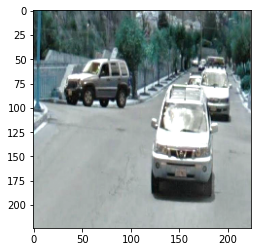

In [11]:
plt.imshow(X[0], cmap="gray")

In [25]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
            loss="binary_crossentropy",
            optimizer=Adam(learning_rate=0.001),
            metrics=["accuracy"])



In [28]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [33]:
import time

# Record the start time
start_time = time.time()

# Check the shapes of the sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Now, train the model on the training set
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224, 3) (1519,)
Validation set: (190, 224, 224, 3) (190,)
Test set: (190, 224, 224, 3) (190,)
Epoch 1/10
48/48 [==============================] - 87s 2s/step - loss: 0.6761 - accuracy: 0.6103 - val_loss: 0.6663 - val_accuracy: 0.6316
Epoch 2/10
48/48 [==============================] - 109s 2s/step - loss: 0.6687 - accuracy: 0.6129 - val_loss: 0.6676 - val_accuracy: 0.6316
Epoch 3/10
48/48 [==============================] - 110s 2s/step - loss: 0.6687 - accuracy: 0.6129 - val_loss: 0.6605 - val_accuracy: 0.6316
Epoch 4/10
48/48 [==============================] - 101s 2s/step - loss: 0.6688 - accuracy: 0.6129 - val_loss: 0.6582 - val_accuracy: 0.6316
Epoch 5/10
48/48 [==============================] - 108s 2s/step - loss: 0.6686 - accuracy: 0.6129 - val_loss: 0.6583 - val_accuracy: 0.6316
Epoch 6/10
43/48 [=========================>....] - ETA: 8s - loss: 0.6679 - accuracy: 0.6148 

KeyboardInterrupt: 

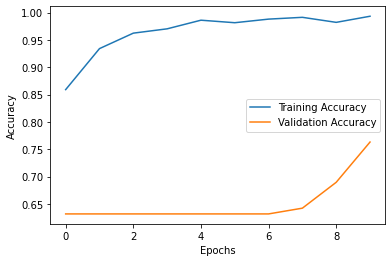

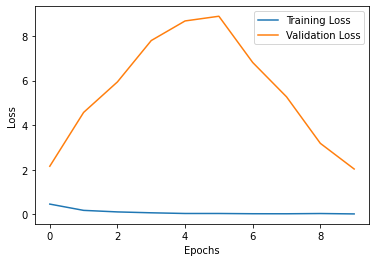

6/6 [==============================] - 4s 582ms/step - loss: 2.4527 - accuracy: 0.6842
Test Accuracy: 68.42%


In [19]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [20]:
model.save('police_car_detection_color_enhance.h5')

C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Image processing function
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
    
    # Color balancing
    balanced_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    balanced_img[:, :, 0] = cv2.equalizeHist(balanced_img[:, :, 0])
    balanced_img = cv2.cvtColor(balanced_img, cv2.COLOR_LAB2RGB)
    
    # Resize the image
    resized_img = cv2.resize(balanced_img, (img_size, img_size))
    
    # Normalize pixel values to the range [0, 1]
    resized_img = resized_img / 255.0
    
    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)
    
    return resized_img


In [22]:
model = tf.keras.models.load_model('police_car_detection_color_enhance.h5')

In [23]:
prediction = model.predict([prepare("test.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 181ms/step
Police


In [24]:
prediction = model.predict([prepare("test1.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 38ms/step
Police
